# Project 1 Title - Exploratory Data Analysis (EDA) on Iris Dataset

<b>Project ID - #CC69855</b> Entry Level

<b>1.Load the Data</B>

In [1]:

# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline


In [58]:
# load datset through sklearn library

from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Map target values to species names
data['species'] = data['species'].map({i: iris.target_names[i] for i in range(3)})


In [59]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [61]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
data.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<b>2.Clean the dataset</b>

In [64]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [65]:
data.duplicated().sum()

1

In [66]:
data.drop_duplicates(inplace=True)

In [67]:
data.duplicated().sum()

0

<b>3.Data Visualization</b>

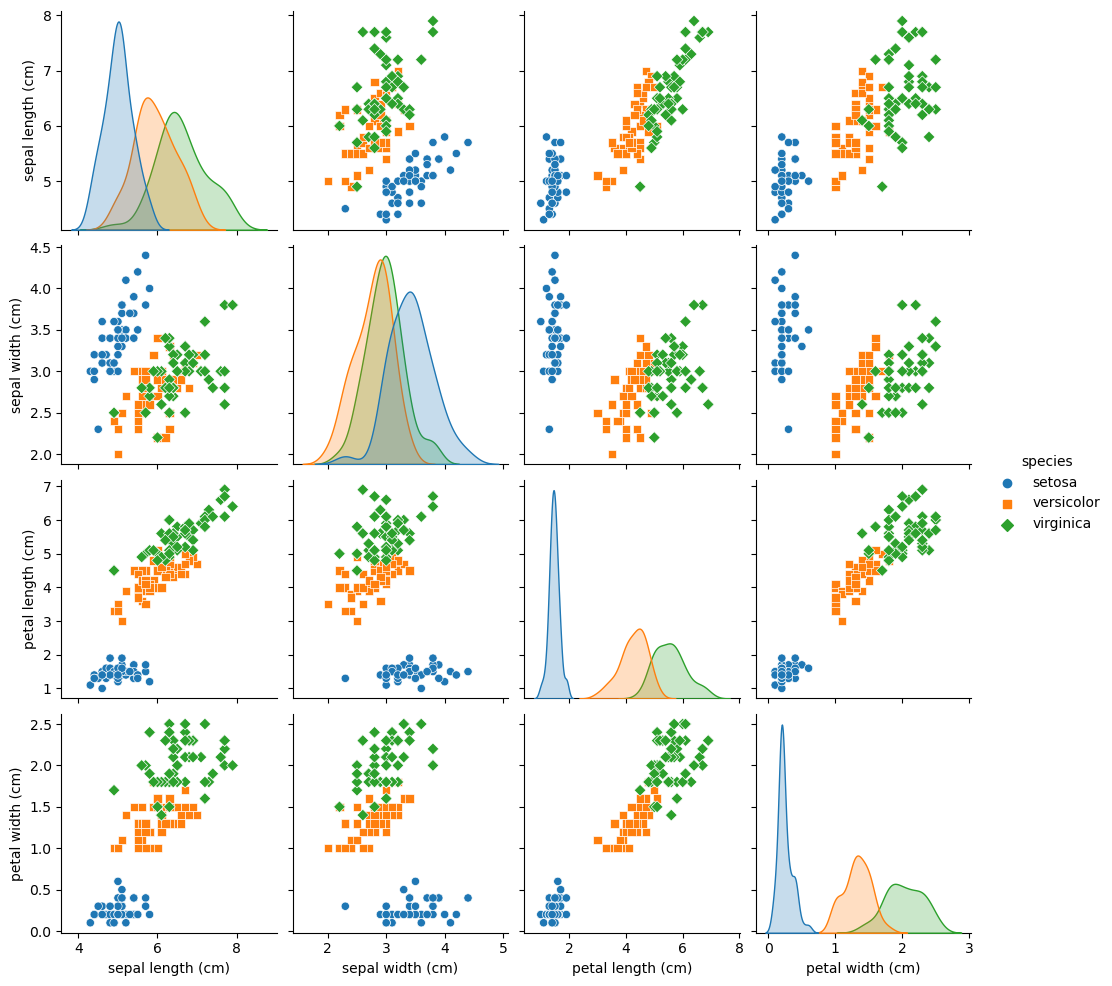

In [82]:
# A pairplot shows the pairwise relationships in the dataset.
#This helps in understanding the distribution and relationships between features.

sns.pairplot(data, hue='species', markers=['o', 's', 'D'])
plt.show()

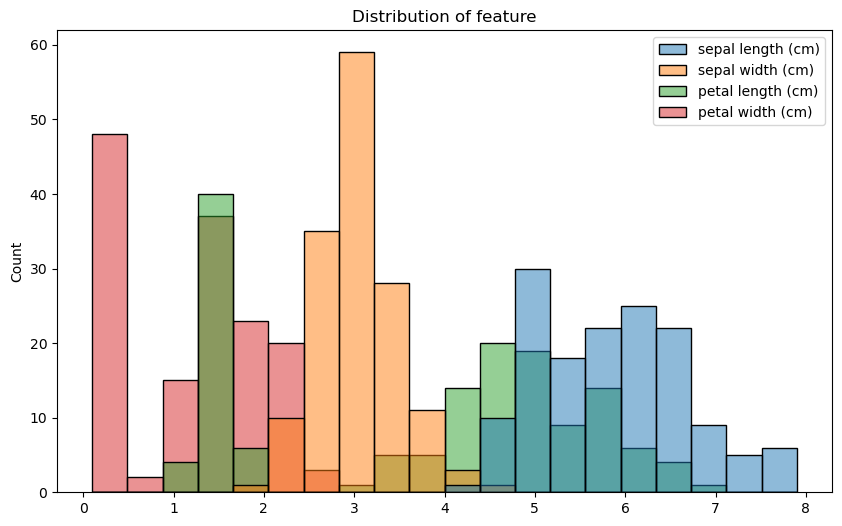

In [69]:
#histplot
plt.figure(figsize=(10, 6))
sns.histplot(data[:-1], bins=20)
plt.title('Distribution of feature')
plt.show()

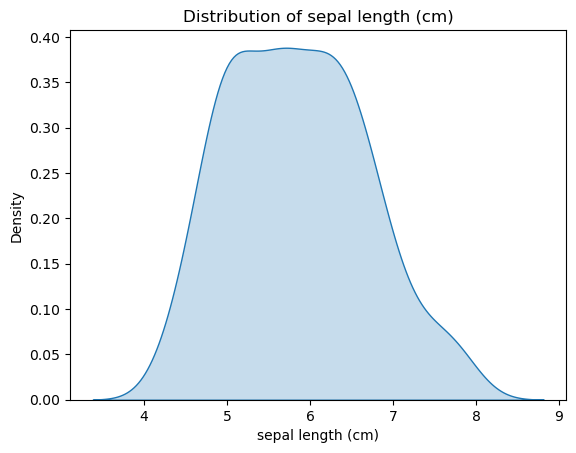

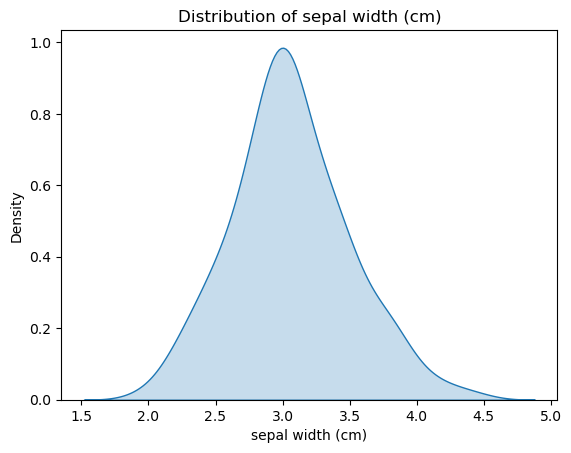

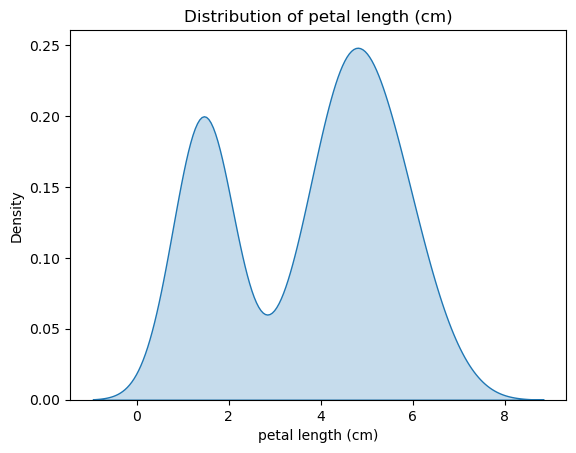

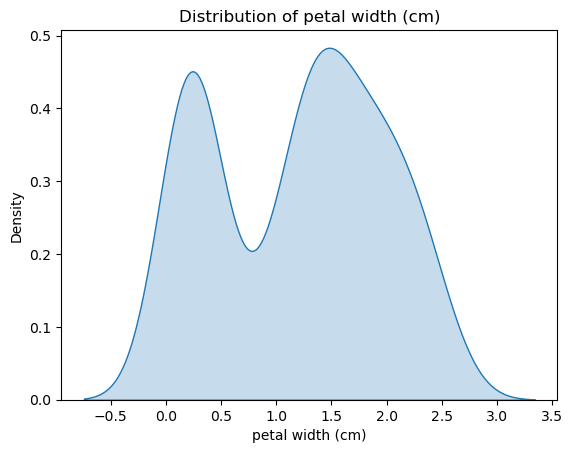

In [73]:
# KDE plots
for feature in data.columns[:-1]:
    sns.kdeplot(data[feature], shade=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


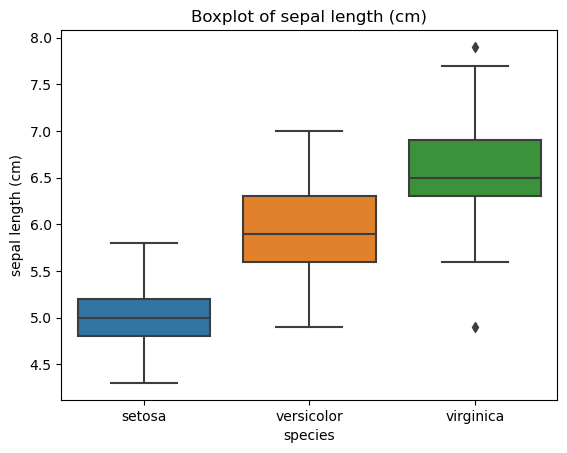

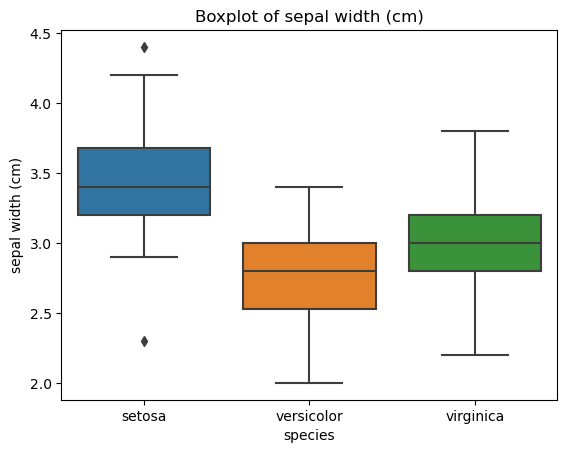

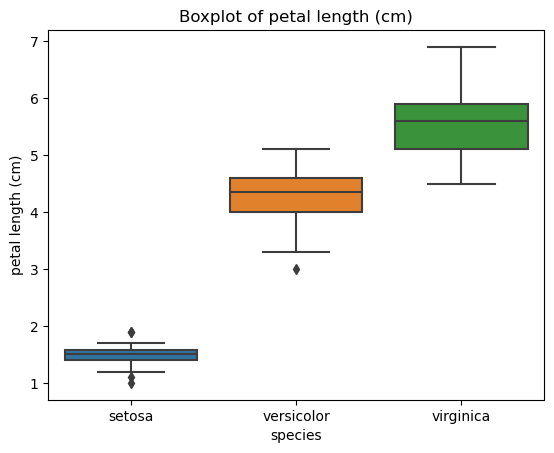

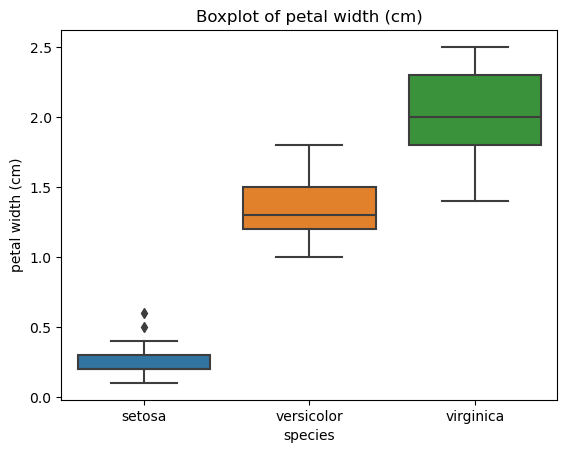

In [74]:
# Boxplots
for feature in data.columns[:-1]:
    sns.boxplot(x='species', y=feature, data=data)
    plt.title(f'Boxplot of {feature}')
    plt.show()

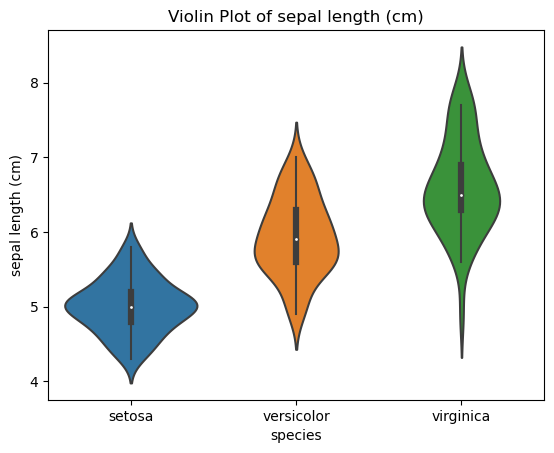

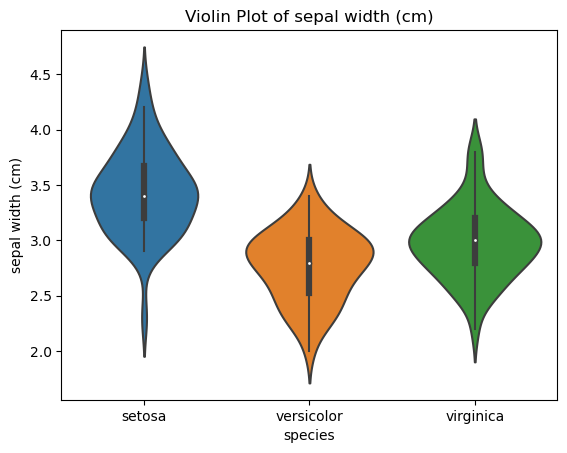

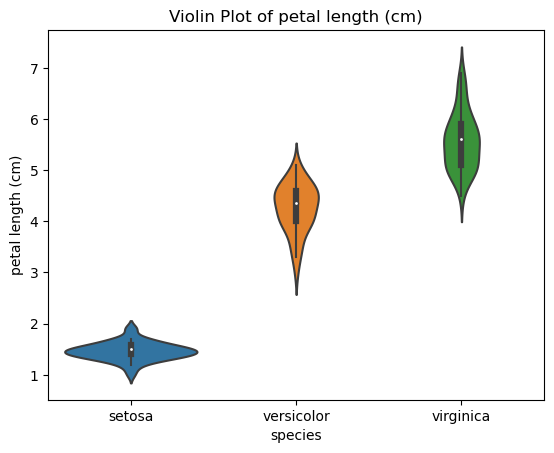

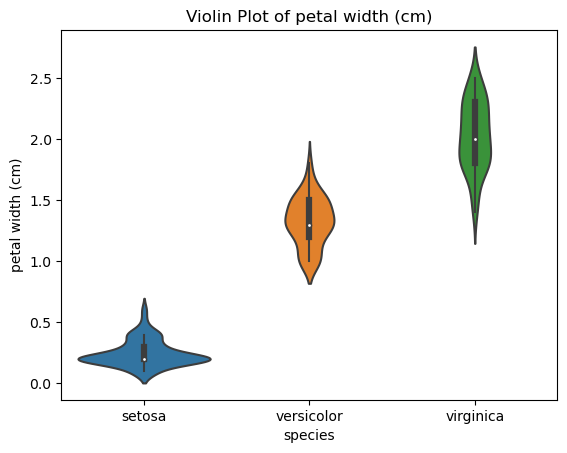

In [75]:
# Violin plots for each feature
for feature in iris.feature_names:
    sns.violinplot(x='species', y=feature, data=data)
    plt.title(f'Violin Plot of {feature}')
    plt.show()

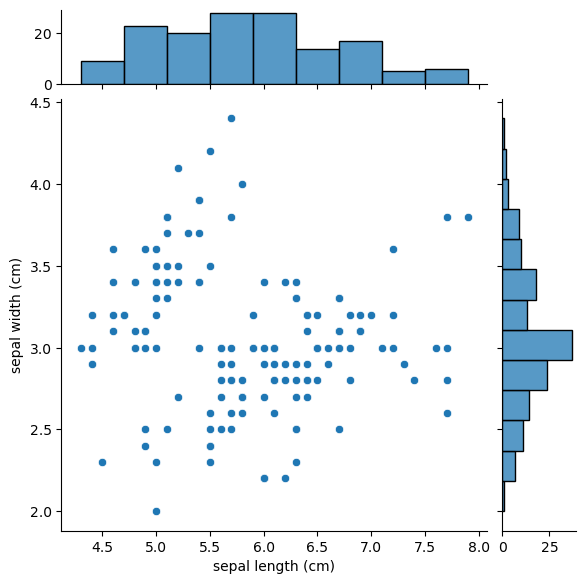

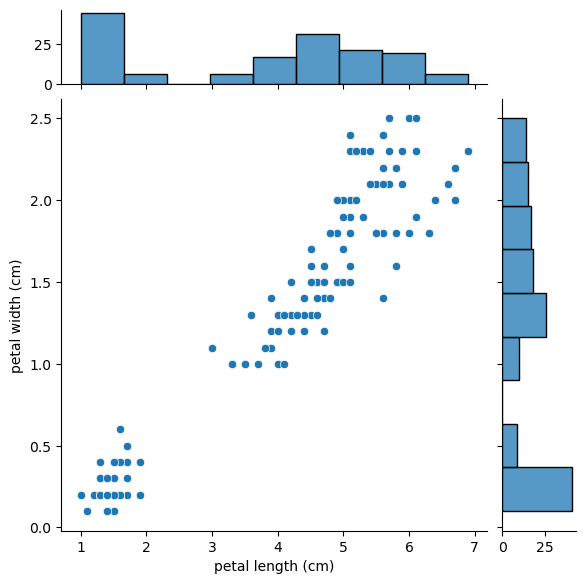

In [86]:
# Scatter plot with marginal histograms
sns.jointplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', kind='scatter', marginal_ticks=True)
plt.show()

sns.jointplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', kind='scatter', marginal_ticks=True)
plt.show()


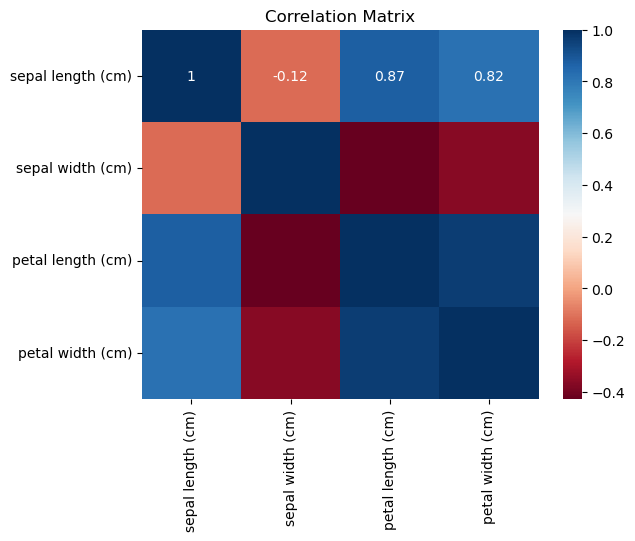

In [85]:
#Heatmap
# Drop non-numeric columns for correlation matrix calculation
df_numeric = df.drop(columns=['species'])

# Calculate the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()